# Video Data EDA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import datetime
import numpy as np


In [2]:
data_path = "/mount/data"

In [3]:
url_dataset = pd.read_csv(data_path + '/creative_commons_youtube_videos.csv')
url_dataset.head()

,video_id,url,title,license,relevant,renamed_title
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4


In [4]:
#get names of all videos that WERE downloaded
succesful_downloads = []

for video in glob.glob(data_path + '/videos/*.mp4'):
    title = video.replace(data_path + '/videos/', '')
    succesful_downloads.append(title)
    
succesful_downloads[0:5]

['video_0264.mp4',
 'video_0041.mp4',
 'video_0094.mp4',
 'video_0267.mp4',
 'video_0043.mp4']

True     186
False    182
Name: relevant, dtype: int64 



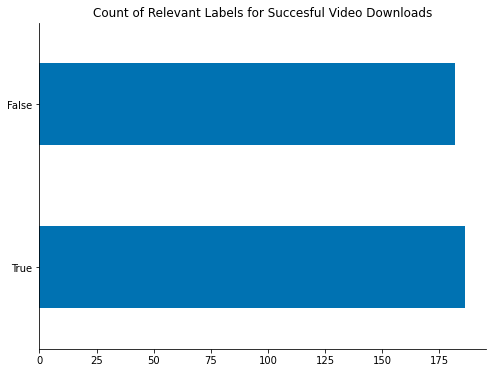

In [7]:
#check class labels of successful downloads
downloads_df = url_dataset.loc[url_dataset['renamed_title'].isin(succesful_downloads)]

print(downloads_df.relevant.value_counts(), '\n')
plt.style.use('seaborn-colorblind')
ax = downloads_df.relevant.value_counts().plot(kind='barh', \
                                               title='Count of Relevant Labels for Succesful Video Downloads', \
                                               figsize=(8,6));

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

`Class counts are roughly equal, though slightly less (-15ish) videos of original dataset`

In [5]:
# downloads_df = downloads_df.drop(columns=['Unnamed: 0'])
# downloads_df

,video_id,url,title,license,relevant,renamed_title
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4
...,...,...,...,...,...,...
363,K1RzTZI9p5U,https://youtu.be/K1RzTZI9p5U,El Secreto del Sueño: Un mito aborigen austral...,creativeCommon,False,video_0425.mp4
364,XIhVygewzsM,https://youtu.be/XIhVygewzsM,The World&#39;s Strangest Capital Cities,creativeCommon,False,video_0427.mp4
365,nYGZBz5iqe8,https://youtu.be/nYGZBz5iqe8,#HealyHustle | The Elephant Story - What do El...,creativeCommon,False,video_0428.mp4
366,uL8pTh8exNI,https://youtu.be/uL8pTh8exNI,하와이 캠핑 빅아일랜드 스펜서 비치파크 (Feat. 마할로의 시크릿 비치도 공개합니다),creativeCommon,False,video_0429.mp4


In [50]:
# downloads_df.to_csv(data_path + '/downloaded_videos.csv', index=False)
# downloads_df.to_csv('/workspace/youtube-humpback-whale-classifier/data/downloaded_videos.csv', index=False)

## Video Durations

In [7]:
#the df of the videos that were actually downloaded into the workspace
downloads_df = pd.read_csv(data_path + '/downloaded_videos.csv')
downloads_df.head()

,video_id,url,title,license,relevant,renamed_title
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4


In [21]:
def get_video_duration(video_title, silent = True):

    #get video
    data = cv2.VideoCapture(data_path + '/videos/' + video_title)

    # count the number of frames
    frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = int(data.get(cv2.CAP_PROP_FPS))


    # calculate duration of the video
    seconds = int(frames / fps)
    video_time = str(datetime.timedelta(seconds=seconds))

    if silent == False:
        print("duration in seconds:", seconds)
        print("video time:", video_time)
    
    return seconds, video_time

In [34]:
#get durations for videos that successfully downloaded
video_duration_seconds = []
video_duration_times = []

for video in downloads_df.renamed_title:
    seconds, video_time = get_video_duration(video)
    video_duration_seconds.append(seconds)
    video_duration_times.append(video_time)

print('Done collection video duration info.')

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x624cdc0] Unknown projection type: ytmp
[av1 @ 0x624c580] Your platform doesn't suppport hardware accelerated AV1 decoding.
[av1 @ 0x624c580] Failed to get pixel format.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] Missing Sequence Header.
[av1 @ 0x624c580] video_get_buffer: image parameters invalid
[av1 @ 0x6

Done collection video duration info.


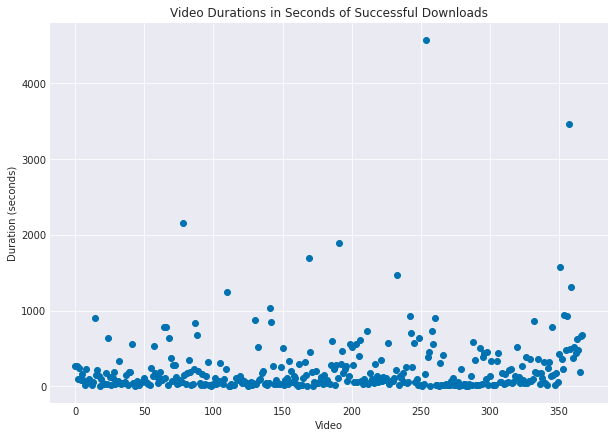

In [41]:
#scatterplot of video durations in seconds
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.scatter([i for i in range(0, len(downloads_df.renamed_title))], video_duration_seconds)
plt.xlabel('Video')
plt.ylabel('Duration (seconds)')
plt.title('Video Durations in Seconds of Successful Downloads');

Mean Video Duration (seconds):    230.51902173913044
Median Video Duration (seconds):  100.0
Max Video Duration (seconds):     4572
Min Video Duration (seconds):     4 



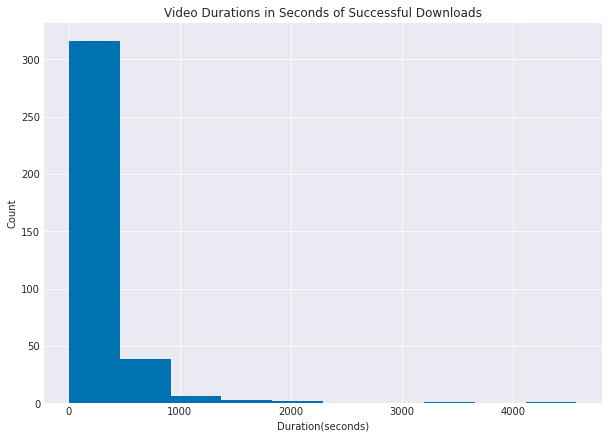

In [48]:
#histogram of video durations in seconds
print('Mean Video Duration (seconds):   ', np.array(video_duration_seconds).mean())
print('Median Video Duration (seconds): ', np.median(np.array(video_duration_seconds)))
print('Max Video Duration (seconds):    ', np.array(video_duration_seconds).max())
print('Min Video Duration (seconds):    ', np.array(video_duration_seconds).min(), '\n')

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.hist(video_duration_seconds)
plt.xlabel('Duration(seconds)')
plt.ylabel('Count')
plt.title('Video Durations in Seconds of Successful Downloads');